# DETEKSI PLAT NOMOR

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
image = "asset/angel.jpg"

In [8]:
def deteksi_plat1(image_path):
    # Memuat Gambar
    image = cv2.imread(image_path)
    
    # Convert gambar menjadi grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Deteksi Tepi
    edges = cv2.Canny(gray, 100, 200)
    
    # Temukan kontur daerah plat nomor
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter kontur berdasarkan area dan rasio
    min_area = 500  
    min_aspect_ratio = 2
    
    candidate_plates = []
    
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = w / float(h)
        area = cv2.contourArea(contour)
        
        if area > min_area and aspect_ratio > min_aspect_ratio:
            candidate_plates.append(contour)
            
    # Urutkan pelat kandidat berdasarkan ukuran dalam urutan menurun
    candidate_plates = sorted(candidate_plates, key=cv2.contourArea, reverse=True)
    
    if len(candidate_plates) > 0:
        # Pilih pelat kandidat terbesar
        largest_plate = candidate_plates[0]
        
        # Gambar persegi panjang pembatas
        x, y, w, h = cv2.boundingRect(largest_plate)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        # Terapkan transformasi perspektif untuk memperbesar pelat
        src_pts = np.float32([[x, y], [x + w, y], [x, y + h], [x + w, y + h]])
        dst_pts = np.float32([[0, 0], [300, 0], [0, 100], [300, 100]]) 
        
        matrix = cv2.getPerspectiveTransform(src_pts, dst_pts)
        result = cv2.warpPerspective(image, matrix, (300, 100))
        
        edges = cv2.Canny(result, 50, 255, L2gradient=False)
        
        gray_result = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
        _, binary_result = cv2.threshold(gray_result, 127, 255, cv2.THRESH_BINARY)
        
        # Buat gambar dengan empat subplot
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        ax = axes.ravel()

        # Gambar Asli
        ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax[0].set_title("Gambar asli")

        # Deteksi Plat
        ax[1].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        ax[1].set_title("Plat terdeteksi")

        # Gambar Binary
        ax[2].imshow(binary_result, cmap='gray')
        ax[2].set_title("Binary Image")

        # Gambar Tepi
        ax[3].imshow(edges, cmap='gray')
        ax[3].set_title("Edges Image")

        plt.tight_layout()
        plt.show()
    else:
        print("No license plate found.")

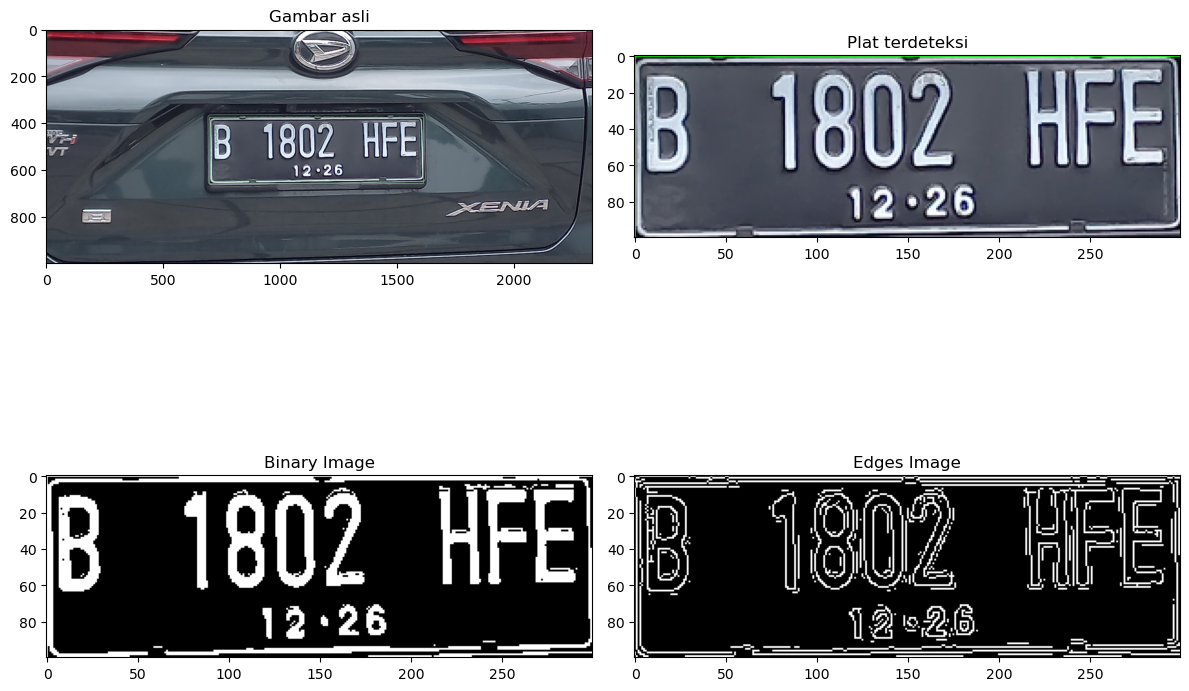

In [9]:
deteksi_plat1(image)